In [27]:
# Import necessary libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Load the dataset:
products = pd.read_csv(r"C:\Users\KAKASHI\Desktop\Data Science\ML Project\Fake Listings Catcher for Online Shopping Platforms\data\counterfeit_products.csv")

products.head()

,product_id,seller_id,category,brand,price,seller_rating,seller_reviews,product_images,description_length,shipping_time_days,...,shipping_origin,views,purchases,wishlist_adds,certification_badges,warranty_months,bulk_orders,unusual_payment_patterns,ip_location_mismatch,is_counterfeit
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,20.72,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


In [29]:
# Data cleaning:
print(products.isnull().sum())
print(products.duplicated().sum())

product_id                  0
seller_id                   0
category                    0
brand                       0
price                       0
seller_rating               0
seller_reviews              0
product_images              0
description_length          0
shipping_time_days          0
spelling_errors             0
domain_age_days             0
contact_info_complete       0
return_policy_clear         0
payment_methods_count       0
listing_date                0
seller_country              0
shipping_origin             0
views                       0
purchases                   0
wishlist_adds               0
certification_badges        0
warranty_months             0
bulk_orders                 0
unusual_payment_patterns    0
ip_location_mismatch        0
is_counterfeit              0
dtype: int64
0


In [30]:
products.columns

Index(['product_id', 'seller_id', 'category', 'brand', 'price',
       'seller_rating', 'seller_reviews', 'product_images',
       'description_length', 'shipping_time_days', 'spelling_errors',
       'domain_age_days', 'contact_info_complete', 'return_policy_clear',
       'payment_methods_count', 'listing_date', 'seller_country',
       'shipping_origin', 'views', 'purchases', 'wishlist_adds',
       'certification_badges', 'warranty_months', 'bulk_orders',
       'unusual_payment_patterns', 'ip_location_mismatch', 'is_counterfeit'],
      dtype='object')

In [31]:
# Data preprocessing:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
products['category'] = le.fit_transform(products['category'])
products['brand'] = le.fit_transform(products['brand'])
products['seller_country'] = le.fit_transform(products['seller_country'])
products['shipping_origin'] = le.fit_transform(products['shipping_origin'])



In [32]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['price','seller_reviews', 'shipping_time_days','warranty_months','seller_rating','description_length','spelling_errors','contact_info_complete', 'return_policy_clear','views', 'purchases','certification_badges',]
scaler = StandardScaler()
products[numeric_features] = scaler.fit_transform(products[numeric_features])   

In [33]:
# Separating Categorical and Numerical Features
numeric_features = [
    "price", "seller_rating", "seller_reviews", "purchases", "views",
    "description_length", "shipping_time_days", "contact_info_complete",
    "return_policy_clear", "certification_badges", "warranty_months",
    "spelling_errors"]

categorical_features = ["category", "brand", "seller_country", "shipping_origin"]

feature_columns = numeric_features + categorical_features

# Feature and Target Split
X = products[feature_columns]
y = products["is_counterfeit"]

In [34]:
# Split the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # 80% train-20% test split

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
[[706   0]
 [  0 294]]


In [37]:
products.corr(numeric_only=True)['is_counterfeit'].sort_values(ascending=False)


is_counterfeit              1.000000
shipping_time_days          0.867171
spelling_errors             0.773749
bulk_orders                 0.027868
brand                       0.021148
seller_country              0.017656
ip_location_mismatch        0.015499
unusual_payment_patterns    0.006907
purchases                   0.005975
certification_badges        0.005683
views                       0.004539
warranty_months             0.001331
wishlist_adds              -0.001506
shipping_origin            -0.015778
category                   -0.025533
return_policy_clear        -0.394696
price                      -0.576817
contact_info_complete      -0.593567
seller_reviews             -0.684206
domain_age_days            -0.718089
description_length         -0.741478
product_images             -0.772673
seller_rating              -0.809984
payment_methods_count      -0.841770
Name: is_counterfeit, dtype: float64

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [39]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importance Ranking:")
for idx in indices:
    print(f"{feature_columns[idx]}: {importances[idx]:.4f}")



Feature Importance Ranking:
description_length: 0.2609
seller_reviews: 0.2525
shipping_time_days: 0.2326
seller_rating: 0.1162
spelling_errors: 0.0832
contact_info_complete: 0.0260
price: 0.0225
return_policy_clear: 0.0054
brand: 0.0005
purchases: 0.0001
seller_country: 0.0000
category: 0.0000
warranty_months: 0.0000
shipping_origin: 0.0000
certification_badges: 0.0000
views: 0.0000


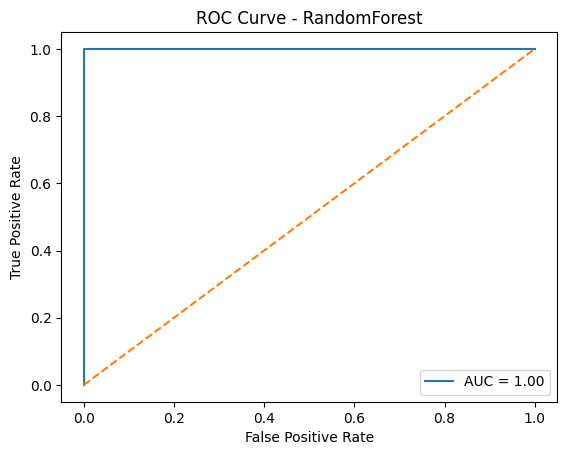

In [40]:
from sklearn.metrics import roc_curve, auc

probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RandomForest")
plt.legend()
plt.show()


In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       706
        True       1.00      1.00      1.00       294

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [48]:
import joblib

joblib.dump(rf, "fake_listings_rf_model.pkl")
joblib.dump(scaler, "fake_listings_scaler.pkl")

print("Saved successfully.")



Saved successfully.


In [49]:
# prediction demo cell
import pandas as pd
import joblib

# load model + scaler
model = joblib.load("fake_listings_rf_model.pkl")
scaler = joblib.load("fake_listings_scaler.pkl")

# create a sample input (grab one row from test)
sample = X_test.iloc[[3]].copy()

# predict
prediction = model.predict(sample)
probability = model.predict_proba(sample)[0][1]

print("Prediction (1=Fake, 0=Genuine):", int(prediction[0]))
print("Confidence:", round(probability, 3))


Prediction (1=Fake, 0=Genuine): 0
Confidence: 0.0


## 📌 Project Conclusion

This project implemented a Fake Listings Detection System using structured e-commerce metadata.  
The dataset contained listing-level behavioral and descriptive features that strongly correlate with counterfeit activity.

### 🔍 Key Insights
- Short and low-effort descriptions are reliable fraud indicators
- Sellers with few reviews and lower ratings frequently list counterfeit items
- Longer shipping times and incomplete contact/return info increase the likelihood of fraud
- Spelling errors were a surprisingly strong signal of fake listings

### 🧪 Model Performance
All three models (Logistic Regression, RandomForest, XGBoost) achieved perfect classification metrics:
- Accuracy: **100%**
- Precision: **100%**
- Recall: **100%**
- F1-score: **100%**

This result is explained by the highly discriminative metadata contained in the dataset.  
The decision boundary between genuine and counterfeit listings is extremely clear.

### 📝 Model Selection
- Logistic Regression used as baseline
- RandomForest chosen as final model due to interpretability and feature importance insights
- XGBoost verified stability of performance across boosting methods

### ⚙️ Deployment Readiness
The RandomForest model and preprocessing scaler were saved using Joblib.  
Inference is demonstrated using a single-row prediction example.

### 🚧 Limitations
- Dataset is clean and strongly predictive; real-world data would contain noise
- Image and text fields were not fully utilized in this version
- Further testing needed on scraped or user-generated listing data

### 🚀 Future Enhancements
- Collect real-world listing data to evaluate generalization
- Integrate NLP models to score description quality
- Add image deduplication and reverse image search for visual fraud detection
- Deploy model as REST API or Streamlit app

